# Spectral Clustering Tutorial

## Q1
This notebook provides code for spectral clustering on a synthetic half-moons dataset. The code uses `nearest_neighbors` for affinity; modify the code so that it uses `rbf`. This option will not produce a great clustering without adjusting parameters. Adjust the `gamma` parameter to improve the quality of the clustering. 


In [46]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering

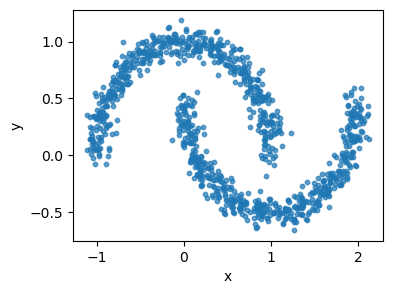

In [47]:
moons_data = make_moons(n_samples=1000, noise=0.07, random_state=0)
moons = pd.DataFrame(data=moons_data[0], columns=['x', 'y'])
moons['label_truth'] = moons_data[1]

moons.plot(
    kind='scatter',
    x='x',
    y='y',
    figsize=(4, 3),
    s=10,
    alpha=0.7
);

<Axes: xlabel='x', ylabel='y'>

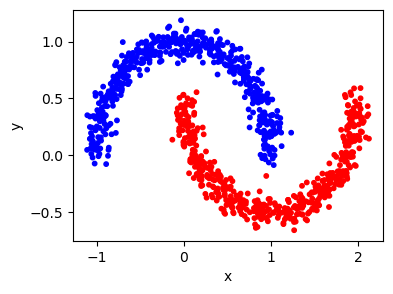

In [48]:
NNsclust = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    n_neighbors=7,
)

NNsclust.fit(moons[['x', 'y']]);
cm = {0: 'r', 1: 'b'}
label_color = [cm[l] for l in NNsclust.labels_]

moons.plot(
    kind='scatter',
    x='x',
    y='y',
    figsize=(4, 3),
    s=10,
    c=label_color
)

What does the affinity matrix look like?

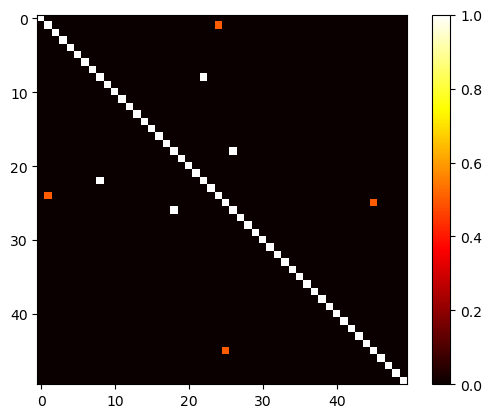

In [49]:
a = NNsclust.affinity_matrix_.todense()
plt.imshow(a[:50, :50], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

### Solutuion

### RBF Kernel 
What does the RBF kernel (function) do?  
The RBF kernel provides a *distance* between two points:  
$K(X_1,X_2) = e^-\frac{||X_1 - X_2||^2}{2\sigma^2} = e^{-\gamma||X_1 - X_2||^2}$
where $\gamma = \frac{1}{2\sigma^2}$  
We see below how larger $\gamma$ reduces the *width* of the RBF kernel.

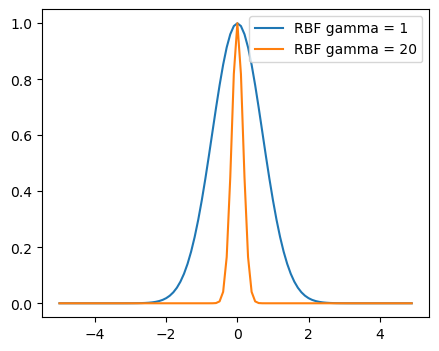

In [50]:
import math

X_vals = np.arange(-5, 5, 0.1)
rbf1 = []
rbf20 = []
for x in X_vals:
    rbf1.append(math.exp(-1 * (0 - x) ** 2))
    rbf20.append(math.exp(-20 * (0 - x) ** 2))
plt.figure(figsize=(5, 4))
plt.plot(X_vals, rbf1, label="RBF gamma = 1")
plt.plot(X_vals, rbf20, label="RBF gamma = 20")
plt.legend(loc="upper right")


<Axes: xlabel='x', ylabel='y'>

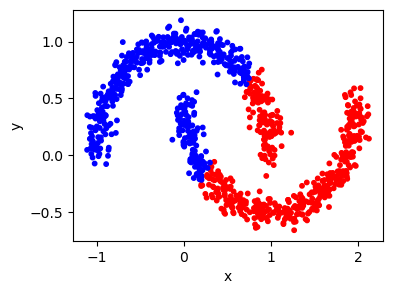

In [51]:
RBF1sclust = SpectralClustering(
    n_clusters=2,
    affinity='rbf',
    gamma=1
)

RBF1sclust.fit(moons[['x', 'y']]);
cm = {0: 'r', 1: 'b'}
label_color = [cm[l] for l in RBF1sclust.labels_]

moons.plot(
    kind='scatter',
    x='x',
    y='y',
    figsize=(4, 3),
    s=10,
    c=label_color
)

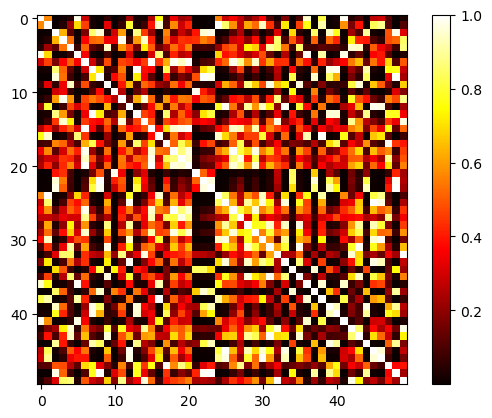

In [52]:
a1 = RBF1sclust.affinity_matrix_
plt.imshow(a1[:50, :50], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

<Axes: xlabel='x', ylabel='y'>

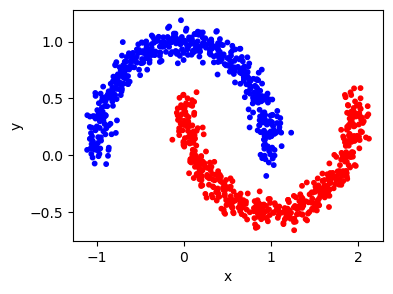

In [53]:
RBF1sclust = SpectralClustering(
    n_clusters=2,
    affinity='rbf',
    gamma=35,
)

RBF1sclust.fit(moons[['x', 'y']]);
cm = {0: 'r', 1: 'b'}
label_color = [cm[l] for l in RBF1sclust.labels_]

moons.plot(
    kind='scatter',
    x='x',
    y='y',
    figsize=(4, 3),
    s=10,
    c=label_color
)

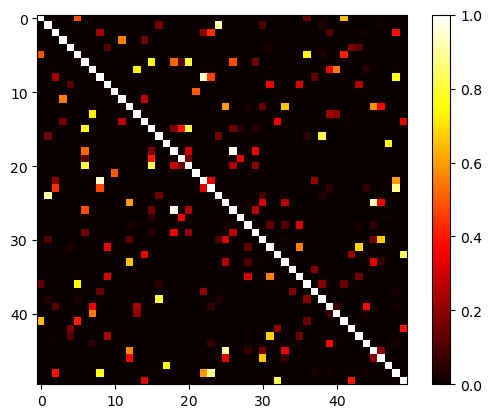

In [54]:
a35 = RBF1sclust.affinity_matrix_
plt.imshow(a35[:50, :50], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()